Set up the PYTHONPATH so it can find the python modules we'll be using.

In [1]:
import sys, os
sys.path.append(os.path.join(os.path.pardir, 'python'))

Import the geometry module

In [2]:
import geometry as geo

Set the base resolution that will be used throughout

In [3]:
minres = 10.0

In [4]:
geo.SlabSpline?

Init signature: geo.SlabSpline(xs, ys, res=None, name=None, sid=None, bctype='natural')
Docstring:      <no docstring>
File:           ~/Documents/Fenicsx-subduction/python/geometry.py
Type:           type
Subclasses:     

In [5]:
slab = geo.SlabSpline([0.0, 140.0, 240.0, 400.0], [0.0, -70.0, -120.0, -200.0], 
                       res=[2*minres, 1*minres, 1*minres, 6*minres], sid=1, name="Slab")
print(len(slab.points))

4


/Users/kteshome/anaconda3/envs/fenicsx2-env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [6]:
# add partial coupling depths
slab.addpoint(80, "Slab::PartialCouplingDepth", res=1*minres)
slab.addpoint(82.5, "Slab::FullCouplingDepth", res=1*minres)
print(len(slab.points))

6


In [7]:
geo.SubductionGeometry?

Init signature: geo.SubductionGeometry(slab_spline, **kwargs)
Docstring:      <no docstring>
Init docstring:
Initialize the subduction geometry with the current values of:
* slab_spline:          SlabSpline object describing the slab
* coast_distance (>=0): distance from the trench that the coast is located,
                        does nothing if ==0.0 and the trench is at 0.0 depth
* extra_width (>=0):    extra width of domain beyond the final slab point,
                        does nothing if ==0.0
* slab_side_sid:        surface id of vertical side on slab side of domain
* wedge_side_sid:       surface id of vertical side on wedge side of domain
* slab_base_sid:        surface id of base of slab region of domain
* wedge_base_sid:       surface id of base of wedge region of domain,
                        only used if extra_width > 0.0
* coast_sid:            surface id of line between trench and coast,
                        only used if coast_distance > 0.0 or the slab trench is

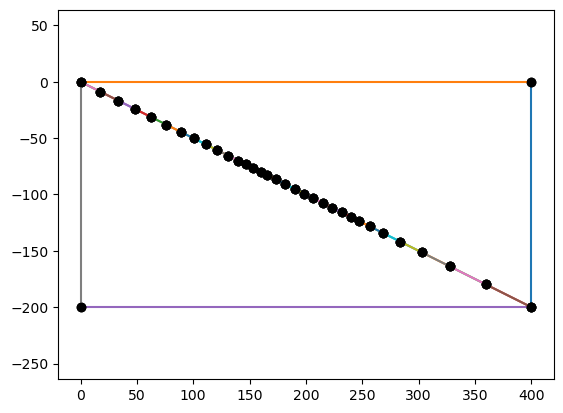

In [8]:
geom = geo.SubductionGeometry(slab, slab_rid=1, wedge_rid=2, 
                                    slab_side_sid=2, wedge_side_sid=3, slab_base_sid=7, 
                                    wedge_base_sid=8, coast_sid=11, top_sid=12,
                                    wedge_top_res=4*minres, slab_base_res=6*minres)
geom.plot()

['WedgeSide', 'LowerCrust']
7


/Users/kteshome/anaconda3/envs/fenicsx2-env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


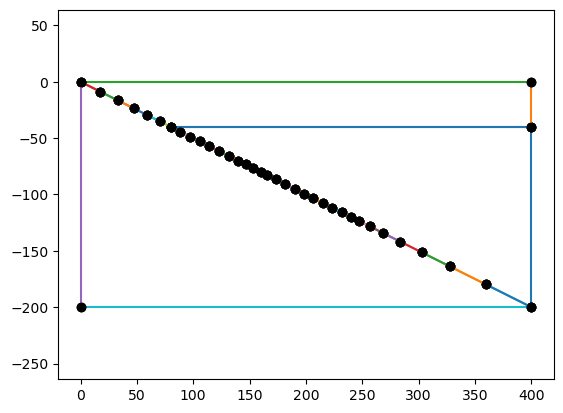

In [9]:
geom.addcrustlayer(40, "LowerCrust", sid=9, rid=3, slab_res=1*minres, side_res=16*minres, side_sid=5)
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])
print(len(slab.points))
geom.plot()


['WedgeSide', 'LowerCrust', 'UpperCrust']


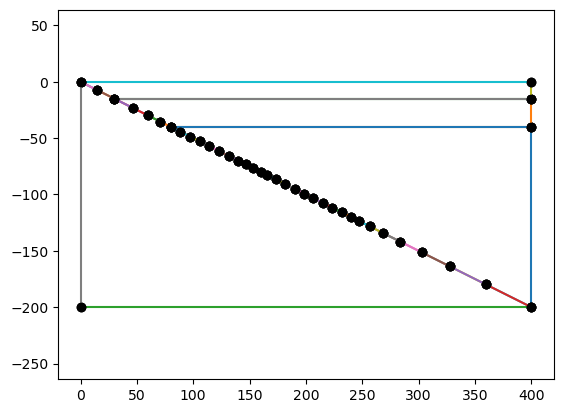

In [10]:
geom.addcrustlayer(15,"UpperCrust", sid=10, rid=4, slab_res= 2*minres, side_res=4*minres, side_sid=6)
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])
geom.plot()

['WedgeSide', 'UpperWedgeSide', 'LowerCrust', 'UpperCrust']


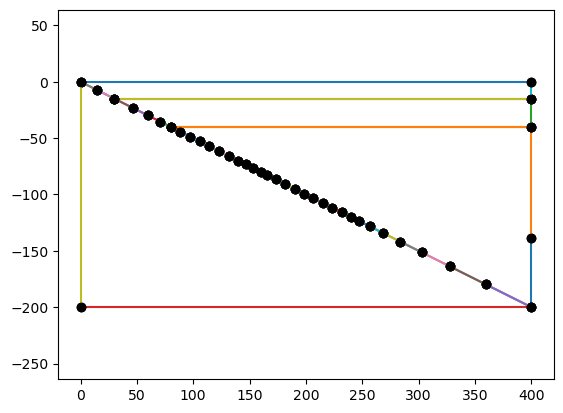

In [11]:
geom.addwedgesidepoint(139, "WedgeSide::InOut", line_name="UpperWedgeSide", res=4*minres, sid=4)
geom.plot()
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])


['WedgeSide', 'UpperWedgeSide', 'LowerCrust', 'UpperCrust']


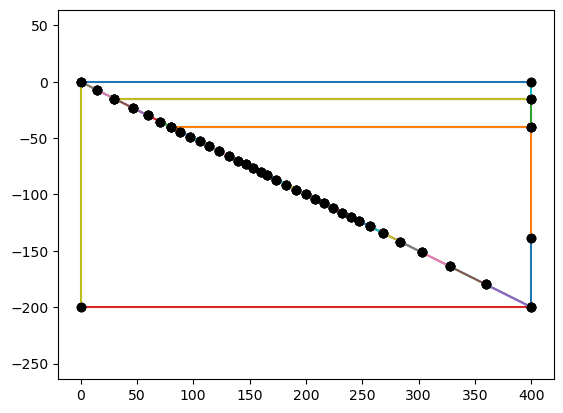

In [12]:
geom.addslabpoint(100, "Slab::DetectorPoint", res=1*minres, sid=1)
geom.plot()
print([geom.wedge_side_lines[i].name for i in range(len(geom.wedge_side_lines))])


In [13]:
mesh, ct, ft = geom.generatemesh()

Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Line)
Info    : [ 20%] Meshing curve 6 (Line)
Info    : [ 20%] Meshing curve 7 (Line)
Info    : [ 20%] Meshing curve 8 (Line)
Info    : [ 20%] Meshing curve 9 (Line)
Info    : [ 30%] Meshing curve 10 (Line)
Info    : [ 30%] Meshing curve 11 (Line)
Info    : [ 30%] Meshing curve 12 (Line)
Info    : [ 30%] Meshing curve 13 (Line)
Info    : [ 40%] Meshing curve 14 (Line)
Info    : [ 40%] Meshing curve 15 (Line)
Info    : [ 40%] Meshing curve 16 (Line)
Info    : [ 40%] Meshing curve 17 (Line)
Info    : [ 40%] Meshing curve 18 (Line)
Info    : [ 50%] Meshing curve 19 (Line)
Info    : [ 50%] Meshing curve 20 (Line)
Info    : [ 50%] Meshing curve 21 (Line)
Info    : [ 50%] Meshing curve 22 (Line)
Info    : [ 60%] Meshing curve 23 (Line)
Info    : [ 60%] Meshing curve 24 (Line)
I


No module named 'trame'

Falling back to a static output.
  warnings.warn(



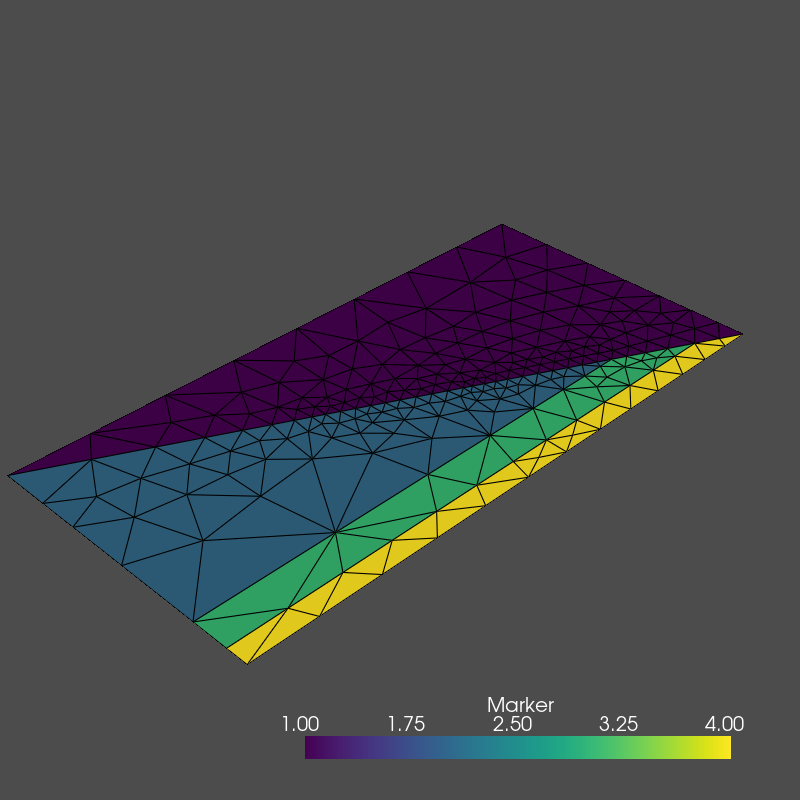

In [14]:
import pyvista
pyvista.start_xvfb()
from dolfinx.plot import create_vtk_mesh
topology, cell_types, x = create_vtk_mesh(mesh, mesh.topology.dim)
grid = pyvista.UnstructuredGrid(topology, cell_types, x)
num_local_cells = mesh.topology.index_map(mesh.topology.dim).size_local
grid.cell_data["Marker"] = ct.values[ct.indices<num_local_cells]
grid.set_active_scalars("Marker")

p = pyvista.Plotter(window_size=[800, 800])
p.add_mesh(grid, show_edges=True)
p.show()

In [15]:
import dolfinx
import numpy as np
import ufl
from dolfinx.fem import Function, FunctionSpace, dirichletbc, locate_dofs_geometrical, locate_dofs_topological, form

Ps2 = ufl.VectorElement("Lagrange", mesh.ufl_cell(), 2)
Ps1 = ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 1)
V = dolfinx.fem.FunctionSpace(mesh, ("CG", 2))
Ve = FunctionSpace(mesh, Ps2)
Pe = FunctionSpace(mesh, Ps1)
THs = Ps2 * Ps1
Vs = FunctionSpace(mesh, THs)

(v_as, p_as) = ufl.TrialFunctions(Vs)
(v_ts, p_ts) = ufl.TestFunctions(Vs)

Vs0, _ = Vs.sub(0).collapse()
Vs00, _ = Vs0.sub(0).collapse()
Vs01, _ = Vs0.sub(1).collapse()
Vs1, _ = Vs.sub(1).collapse()

Pw2 = ufl.VectorElement("Lagrange", mesh.ufl_cell(), 2)
Pw1 = ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 1)

Vwe = FunctionSpace(mesh, Pw2)
Pwe = FunctionSpace(mesh, Pw1)
THw = Pw2 * Pw1
Vw = FunctionSpace(mesh, THw)

(v_aw, p_aw) = ufl.TrialFunctions(Vw)
(v_tw, p_tw) = ufl.TestFunctions(Vw)

Vw0, _ = Vw.sub(0).collapse()
Vw00, _ = Vw0.sub(0).collapse()
Vw01, _ = Vw0.sub(1).collapse()
Vw1, _ = Vw.sub(1).collapse()


Vt = FunctionSpace(mesh, (ufl.FiniteElement("Lagrange", mesh.ufl_cell(), 1)))
T_a = ufl.TrialFunction(Vt)
T_t = ufl.TestFunction(Vt)



In [16]:
all_slab_dofs = dolfinx.fem.locate_dofs_topological(V, 2, ct.find(1))
all_slab_dofs.size

528

In [17]:
all_wedge_dofs = dolfinx.fem.locate_dofs_topological(V, 2, ct.find(2))
all_wedge_dofs.size

297

In [18]:
slab_surface_dofs = dolfinx.fem.locate_dofs_topological(Vs, 1, ft.find(1))
slab_surface_dofs.size

173

In [19]:
slab_dofs = np.asarray([dof for dof in all_slab_dofs if dof not in slab_surface_dofs])
slab_dofs.size

469

In [20]:
wedge_dofs = np.asarray([dof for dof in all_wedge_dofs if dof not in slab_surface_dofs])
wedge_dofs.size

262

In [21]:
upperC_surface_dofs = dolfinx.fem.locate_dofs_topological(V, 1, ft.find(6))
upperC_surface_dofs

array([428, 475, 476], dtype=int32)

In [22]:
LowerC_surface_dofs =dolfinx.fem.locate_dofs_topological(V, 1, ft.find(5))
LowerC_surface_dofs

array([308, 428, 429], dtype=int32)

In [23]:
UpperWedgeSide_dofs = dolfinx.fem.locate_dofs_topological(V, 1, ft.find(4))


In [24]:
Top_surface_dofs = dolfinx.fem.locate_dofs_topological(V, 1, ft.find(12))

In [25]:
Te = Function(Vt)
Te.x.set(0.0)
bc_Ttop = dirichletbc(Te, Top_surface_dofs)

In [26]:
Top_Wedge_dofs  = dolfinx.fem.locate_dofs_topological(V, 1, ft.find(9))
zero_v = Function(Vw0)
zero_v.x.set(0.0)
bc_WedgeTop = dirichletbc(zero_v, Top_Wedge_dofs)



In [30]:
from petsc4py.PETSc import ScalarType
vo = 0.023716

def slab_velocity(values):
    return_values = np.empty_like(values)
    for i, x in enumerate(values):
        return_values[i] = 0.1*slab.unittangentx(x[0])/vo
    return return_values
Vslab = Function(Vs0)
Vslab.interpolate(slab_velocity)
bc_slabSpline = dirichletbc(vs, slab_surface_dofs)



ValueError: could not broadcast input array from shape (2,) into shape (2592,)

In [35]:
ds = ufl.Measure('ds', domain=mesh, subdomain_data=ct)
dx = ufl.Measure("dx", domain=mesh)

In [36]:
from petsc4py.PETSc import ScalarType

zero_c = dolfinx.fem.Constant(mesh, ScalarType(0.0))

Ss = ufl.inner(ufl.grad(v_as), ufl.grad(v_ts))*ufl.ds(1)
fs = zero_c * v_ts[0] * ufl.ds(1)
problem_vs = dolfinx.fem.petsc.LinearProblem(Ss, fs, bcs=[bc_slabSpline], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
vs_i = problem_vs.solve()

NameError: name 'bc_slabSpline' is not defined

In [37]:
zero_c = dolfinx.fem.Constant(mesh, ScalarType(0.0))

Sw = ufl.inner(ufl.grad(v_aw), ufl.grad(v_tw))*ufl.dx(2)
fw = zero_c * v_tw[0] * ufl.dx(2)
problem_vw = dolfinx.fem.petsc.LinearProblem(Sw, fw, bcs=[bc_wedge], petsc_options={"ksp_type": "preonly", "pc_type": "lu"})
vw_i = problem_vs.solve()

NameError: name 'bc_wedge' is not defined

In [38]:
geom.wedge_side_sid

3